In [2]:
pip install minisom


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=df7c227f5f185611c207b9d05d94e59640dafa79d65d4c8d528fa0221daba737
  Stored in directory: c:\users\galih setiawan\appdata\local\pip\cache\wheels\c8\29\ba\ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


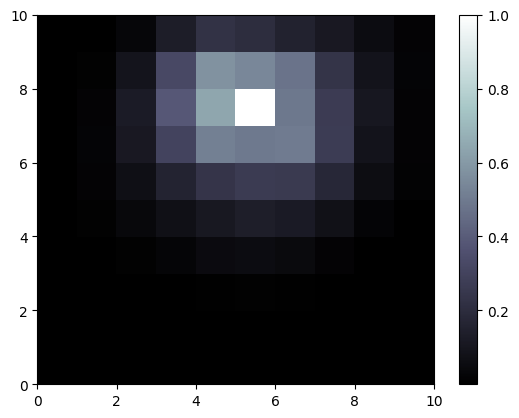

In [4]:
# Install library yang dibutuhkan
# pip install minisom

from minisom import MiniSom
import numpy as np
from pylab import plot, show, pcolor, colorbar, bone

# Contoh data pelanggan dengan 4 fitur (100 pelanggan)
# Kolom: [transaksi/bulan, pengeluaran total, usia, produk per transaksi]
data_pelanggan = np.array([
    [10, 500, 25, 2],
    [15, 1500, 35, 3],
    [8, 200, 50, 1],
    [20, 1000, 28, 5],
    [12, 800, 40, 4],
    # Data pelanggan lainnya
    [9, 700, 32, 3],
    [5, 100, 60, 1],
    [25, 2000, 45, 6],
    [30, 3000, 27, 8],
    [7, 250, 22, 2],
    # Data lainnya sampai 100 pelanggan...
])

# Inisialisasi SOM dengan grid 10x10
som = MiniSom(10, 10, 4, sigma=1.0, learning_rate=0.5)
som.train_random(data_pelanggan, 100)

# Visualisasi hasil
bone()  # Mengatur palet warna grayscale
pcolor(som.distance_map().T)  # Menggambar peta jarak SOM
colorbar()  # Menambahkan skala warna
show()


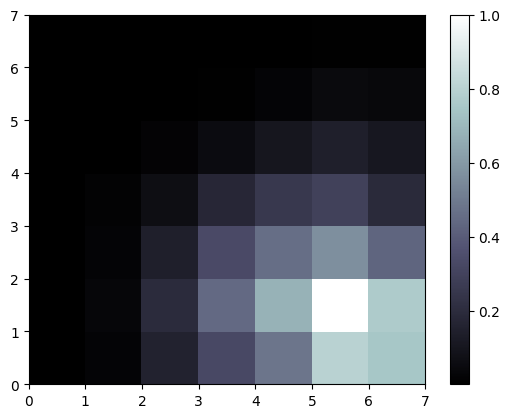

Neuron (6, 2) memiliki pelanggan dengan indeks: [0]
Neuron (6, 1) memiliki pelanggan dengan indeks: [1]
Neuron (3, 2) memiliki pelanggan dengan indeks: [2]
Neuron (4, 0) memiliki pelanggan dengan indeks: [3]
Neuron (4, 1) memiliki pelanggan dengan indeks: [4, 5]
Neuron (6, 4) memiliki pelanggan dengan indeks: [6]
Neuron (5, 0) memiliki pelanggan dengan indeks: [7]
Neuron (6, 0) memiliki pelanggan dengan indeks: [8]
Neuron (6, 3) memiliki pelanggan dengan indeks: [9]


In [5]:
# Install library yang dibutuhkan
# pip install minisom

from minisom import MiniSom
import numpy as np
from sklearn import datasets
from pylab import plot, show, pcolor, colorbar, bone

# Data pelanggan: transaksi/bulan, pengeluaran total, usia, produk per transaksi
data_pelanggan = np.array([
    [10, 500, 25, 2], [15, 1500, 35, 3], [8, 200, 50, 1], [20, 1000, 28, 5],
    [12, 800, 40, 4], [9, 700, 32, 3], [5, 100, 60, 1], [25, 2000, 45, 6],
    [30, 3000, 27, 8], [7, 250, 22, 2] # Tambahkan data sesuai keperluan
])

# Inisialisasi SOM dengan grid 7x7
som = MiniSom(7, 7, 4, sigma=1.0, learning_rate=0.5)
som.train_random(data_pelanggan, 100)

# Visualisasi hasil
bone()  # Mengatur palet warna grayscale
pcolor(som.distance_map().T)  # Menggambar peta jarak SOM
colorbar()  # Menambahkan skala warna
show()

# Menempatkan setiap pelanggan pada neuron di SOM
pelanggan_map = {}

# Proses untuk mencocokkan pelanggan ke neuron yang diaktifkan oleh mereka
for i, pelanggan in enumerate(data_pelanggan):
    posisi = som.winner(pelanggan)  # Menemukan neuron pemenang untuk pelanggan ini
    if posisi not in pelanggan_map:
        pelanggan_map[posisi] = []
    pelanggan_map[posisi].append(i)  # Menyimpan indeks pelanggan yang sesuai dengan neuron tersebut

# Menampilkan hasil pengelompokan pelanggan
for posisi, pelanggan_idx in pelanggan_map.items():
    print(f"Neuron {posisi} memiliki pelanggan dengan indeks: {pelanggan_idx}")


In [6]:
from minisom import MiniSom
import numpy as np

# Data pelanggan sederhana
data_pelanggan = np.array([
    [5, 500, 25],  # Pelanggan 1
    [10, 1000, 35],  # Pelanggan 2
    [2, 200, 50],  # Pelanggan 3
    [7, 800, 28],  # Pelanggan 4
    [12, 1200, 40],  # Pelanggan 5
    [3, 300, 60],  # Pelanggan 6
    [15, 1500, 45],  # Pelanggan 7
    [6, 600, 32],  # Pelanggan 8
    [9, 900, 27],  # Pelanggan 9
    [4, 400, 22]  # Pelanggan 10
])

# Membuat SOM dengan grid 2x2 untuk sederhana (bisa diubah sesuai kebutuhan)
som = MiniSom(2, 2, 3, sigma=1.0, learning_rate=0.5)
som.train_random(data_pelanggan, 100)  # Melatih SOM

# Temukan kelompok (neuron) untuk setiap pelanggan
kelompok_pelanggan = []
for pelanggan in data_pelanggan:
    kelompok_pelanggan.append(som.winner(pelanggan))  # Temukan neuron yang mewakili pelanggan

# Tampilkan kelompok pelanggan
for idx, kelompok in enumerate(kelompok_pelanggan):
    print(f"Pelanggan {idx + 1} dikelompokkan ke neuron: {kelompok}")


Pelanggan 1 dikelompokkan ke neuron: (1, 1)
Pelanggan 2 dikelompokkan ke neuron: (1, 0)
Pelanggan 3 dikelompokkan ke neuron: (1, 1)
Pelanggan 4 dikelompokkan ke neuron: (0, 1)
Pelanggan 5 dikelompokkan ke neuron: (0, 0)
Pelanggan 6 dikelompokkan ke neuron: (1, 1)
Pelanggan 7 dikelompokkan ke neuron: (0, 0)
Pelanggan 8 dikelompokkan ke neuron: (0, 1)
Pelanggan 9 dikelompokkan ke neuron: (1, 0)
Pelanggan 10 dikelompokkan ke neuron: (1, 1)
